# Using Pandas and Python to Explore Your Dataset

by Reka Horvath  Jan 06, 2020.[Here](https://realpython.com/pandas-python-explore-dataset/). [Basic Operations](https://www.geeksforgeeks.org/python-pandas-series/)

## Table of Contents

- Setting Up Your Environment
- Using the Pandas Python Library
- Getting to Know Your Data
    - Displaying Data Types
    - Showing Basics Statistics
    - Exploring Your Dataset
- Getting to Know Pandas’ Data Structures
    - Understanding Series Objects
    - Understanding DataFrame Objects
- Accessing Series Elements
    - Using the Indexing Operator
    - Using .loc and .iloc
- Accessing DataFrame Elements
    - Using the Indexing Operator
    - Using .loc and .iloc
- __Querying Your Dataset__
- Grouping and Aggregating Your Data
- Manipulating Columns
- Specifying Data Types
- __Cleaning Data__
    - __Missing Values__
    - __Invalid Values__
    - __Inconsistent Values__  `outliers`
- Combining Multiple Datasets
    - Avoid missing values
    - Implement join operation: `merge()`
- Visualizing Your Pandas DataFrame
- Conclusion


In this tutorial, you’ll learn how to:

- `Calculate` metrics about your data
- `Perform` basic queries and aggregations
- `Discover` and handle incorrect data, inconsistencies, and missing values
- `Visualize` your data with plots




### Setting Up Your Environment

In [1]:
import requests
import pandas as pd
import numpy as np
from pandas import read_csv

print('Pandas:',pd.__version__)
print('Requests:',requests.__version__)
print('Numpy:',np.__version__)

%matplotlib inline

Pandas: 1.0.5
Requests: 2.24.0
Numpy: 1.18.5


###  Using the Pandas Python Library

In [2]:
# download data
#download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"

#response = requests.get(download_url)
#response.raise_for_status()

In [3]:
# save local data
target_csv_path = "..\\..\\..\\data\\nbaallelo.data.csv"

#with open(target_csv_path, 'wb') as f:
#    f.write(response.content)

#print('Download ready')

In [4]:
# load and take a look of data
nba = pd.read_csv(target_csv_path)
print('Type:', type(nba))
print('Rows:', len(nba))

# see its dimensionality
print('Shape:',nba.shape) 

Type: <class 'pandas.core.frame.DataFrame'>
Rows: 126314
Shape: (126314, 23)


In [5]:
# have a look about first five rows
nba.head(5)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [6]:
# configure Pandas to display all columns
pd.set_option("display.max.columns", None)
nba.head(5)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [7]:
# configure Panda display for decimal places
pd.set_option("display.precision", 2)
nba.head(5)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [8]:
# display the last five rows
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


### Getting to Know Your Data
How to examine your data more systematically.

#### Displaying Data Types
Discover the different data types contains.

In [9]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

The __object__ data type is a special one -`categorical`-. According to the *Pandas Cookbook*, the object data type is “__a catch-all for columns that Pandas doesn’t recognize as any other specific type__.”

#### Showing Basics Statistics

In [10]:
# get an overview of the values each column 
# only analyzes numeric columns by default
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [11]:
# describe only int64 types
nba.describe(include=np.int64)

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,opp_pts
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,102.73
std,18231.93,0.5,17.58,25.38,0.24,14.81,14.81
min,1.00,0.0,1947.00,1.00,0.00,0.00,0.00
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,93.00
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,103.00
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,112.00
max,63157.00,1.0,2015.00,108.00,1.00,186.00,186.00


In [12]:
# provide other data types if you use the include parameter
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,200511230GSW,NBA,4/16/2014,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


Take a look at the team_id and fran_id columns. Your dataset contains 104 different team IDs, but only 53 different franchise IDs. Furthermore, the most frequent team ID is BOS, but the most frequent franchise ID Lakers. How is that possible? You’ll need to explore your dataset a bit more to answer this question.

#### Exploring Your Dataset
Exploratory data analysis can help you answer questions about your dataset. For example, you can examine how often specific values occur in a column:

In [13]:
# examine how often specific values occur 
nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
TRH      60
DTF      60
PIT      60
INJ      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [14]:
nba["lg_id"].value_counts()

NBA    118016
ABA      8298
Name: lg_id, dtype: int64

In [15]:
a = nba["fran_id"].value_counts()
# top 10
a[0:10,] 

Lakers      6024
Celtics     5997
Knicks      5769
Warriors    5657
Pistons     5650
Sixers      5644
Hawks       5572
Kings       5475
Wizards     4582
Spurs       4309
Name: fran_id, dtype: int64

It seems that a team named "Lakers" played 6024 games, but only 5078 of those were played by the Los Angeles Lakers. Find out who the other "Lakers" team is:

In [16]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [17]:
# find out when they played those games
nba.loc[nba["team_id"] == "MNL", "date_game"].min()

'1/1/1949'

In [18]:
nba.loc[nba["team_id"] == "MNL", "date_game"].max()

'4/9/1959'

In [19]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [20]:
# how many points the Boston Celtics have scored during all matches contained in this dataset
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

In [21]:
nba.loc[nba["team_id"] == "BOS"].head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
6,4,194611020PRO,NBA,1,1947,11/2/1946,1,0,BOS,Celtics,53,1300.00,1294.85,40.46,PRO,Steamrollers,59,1300.00,1305.15,A,L,0.36,NaN
14,8,194611050BOS,NBA,0,1947,11/5/1946,2,0,BOS,Celtics,55,1294.85,1288.41,39.79,CHS,Stags,57,1309.65,1316.08,H,L,0.62,NaN
28,15,194611090DTF,NBA,1,1947,11/9/1946,3,0,BOS,Celtics,46,1288.41,1275.28,38.41,DTF,Falcons,69,1268.45,1281.58,A,L,0.39,NaN


### Getting to Know Pandas’ Data Structures
#### Understanding Series Objects
Python’s most basic data structure is the list, which is also a good starting point for getting to know pandas.Series objects.

In [22]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

In [23]:
# A sequence of values
revenues.values

array([5555, 7000, 1980], dtype=int64)

In [24]:
# # A sequence of identifiers, which is the index
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [25]:
# values of a Series object are actually n-dimensional arrays:
type(revenues.values)

numpy.ndarray

In [26]:
city_revenues = pd.Series([4200, 8000, 6500],
                         index=["Amsterdam", "Toronto", "Tokyo"])
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [27]:
# construct a Series with a label index from a dictionary
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

##### Methods to answer questions about your dataset quickly.

In [28]:
city_employee_count.keys(), city_revenues.keys(), revenues.keys()

(Index(['Amsterdam', 'Tokyo'], dtype='object'),
 Index(['Amsterdam', 'Toronto', 'Tokyo'], dtype='object'),
 RangeIndex(start=0, stop=3, step=1))

In [29]:
"Tokyo" in city_employee_count, "New York" in city_employee_count

(True, False)

#### Understanding DataFrame Objects
This data structure is a sequence of Series objects that share the same index.

In [30]:
# combine objects into a DataFrame by providing a dictionary in the constructor
city_data = pd.DataFrame({
     "revenue": city_revenues,
     "employee_count": city_employee_count
})

city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [31]:
# New DataFrame index is the union of the two Series indices
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [32]:
# stores its values in a NumPy array:
city_data.values

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

#####  Refer 2 dimensions of a DataFrame as axes:

In [33]:
city_data.axes

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [34]:
# index rows
city_data.axes[0]

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [35]:
# index columns
city_data.axes[1]

Index(['revenue', 'employee_count'], dtype='object')

In [36]:
# index columns
city_data.columns

Index(['revenue', 'employee_count'], dtype='object')

The axis marked with 0 is the row index, and the axis marked with 1 is the column index. This terminology is important to know because you’ll encounter several DataFrame methods that accept an axis parameter.

In [37]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [38]:
# DataFrame is also a dictionary-like data structure, so supports .keys()
city_data.keys()

Index(['revenue', 'employee_count'], dtype='object')

In [39]:
"Amsterdam" in city_data

False

In [40]:
"revenue" in city_data

True

##### NBA Sample

In [41]:
nba.index

RangeIndex(start=0, stop=126314, step=1)

In [42]:
nba.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [43]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [44]:
"points" in nba.keys()

False

In [45]:
"pts" in nba.keys()

True

### Accessing Series Elements
 A further similarity is that you can use the indexing operator ([]) for Series as well.

You’ll also learn how to use two Pandas-specific access methods:
1. `.loc`
2. `.iloc`

You’ll see that these data access methods can be much more readable than the indexing operator.

#### Using the Indexing Operator

Recall that a Series has two indices:

- __A positional or implicit__ index, which is always a RangeIndex
- __A label or explicit__ index, which can contain any hashable objects

In [46]:
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [47]:
# access values in a Series by 'label'
city_revenues["Toronto"]

8000

In [48]:
# access values in a Series by 'positional'
city_revenues[1]

8000

In [49]:
# use negative indices and slices
city_revenues[-1]

6500

In [50]:
city_revenues[1:]

Toronto    8000
Tokyo      6500
dtype: int64

In [51]:
city_revenues["Toronto":]

Toronto    8000
Tokyo      6500
dtype: int64

#### Using .loc and .iloc
What if the labels are also numbers?

In [52]:
colors = pd.Series(["red", "purple", "blue", "green", "yellow"],
                   index=[1, 2, 3, 5, 8])
colors

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

In [53]:
colors[1]

'red'

What will colors[1] return? For a `positional index`, colors[1] is "purple". However, if you go by the `label index`, then colors[1] is referring to "red".

The good news is, you don’t have to figure it out! Instead, to avoid confusion, the Pandas Python library provides two data access methods:

1. `.loc` refers to the __label index__.
2. `.iloc` refers to the __positional index__.

In [54]:
# label index.
colors.loc[1]

'red'

In [55]:
# positional index.
colors.iloc[1]

'purple'

##### Slicing
.loc and .iloc also support the features you would expect from indexing operators, like slicing. However, these data access methods have an important difference. __While .iloc excludes the closing element, .loc includes it__.

In [56]:
# Return the elements with the implicit index: 1, 2
colors.iloc[1:3]

2    purple
3      blue
dtype: object

In [57]:
# Return the elements with the explicit index between 3 and 8
colors.loc[3:8]

3      blue
5     green
8    yellow
dtype: object

In [58]:
colors.iloc[-2]

'green'

You can use the code blocks above to distinguish between two Series behaviors:

1. You can use `.iloc` on a Series similar to using [] on a __list__.
2. You can use `.loc` on a Series similar to using [] on a __dictionary__.

### Accessing DataFrame Elements
Since a DataFrame consists of Series objects, you can use the very same tools to access its elements. The crucial difference is the additional dimension of the DataFrame. You’ll use the indexing operator for the columns and the access methods .loc and .iloc on the rows.

#### Using the Indexing Operator
If you think of a __DataFrame as a dictionary whose values are Series__, then it makes sense that you can access its columns with the indexing operator:

In [59]:
city_data["revenue"]

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [60]:
type(city_data["revenue"])

pandas.core.series.Series

In [61]:
# If the column name is a string, then you can use attribute-style accessing with dot
city_data.revenue

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [62]:
city_data.employee_count

Amsterdam    5.0
Tokyo        8.0
Toronto      NaN
Name: employee_count, dtype: float64

In [63]:
toys = pd.DataFrame([{"name": "ball", "shape": "sphere"},
                     {"name": "Rubik's cube", "shape": "cube"}])
toys["shape"]

0    sphere
1      cube
Name: shape, dtype: object

In [64]:
toys.shape

(2, 2)

`There’s one situation where accessing DataFrame elements with dot notation may not work or may lead to surprises. This is when a column name coincides with a DataFrame attribute or method name`

#### Using .loc and .iloc

DataFrame also provides .loc and .iloc data access methods, use `.loc` uses the label and `.iloc` the positional index:

In [65]:
city_data.loc["Amsterdam"]

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [66]:
city_data.loc["Tokyo": "Toronto"]

,revenue,employee_count
Tokyo,6500,8.0
Toronto,8000,NaN


In [67]:
city_data.iloc[1]

revenue           6500.0
employee_count       8.0
Name: Tokyo, dtype: float64

In [68]:
nba.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                 1.7e+03
elo_n                 1.7e+03
win_equiv                  59
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i             1.8e+03
opp_elo_n             1.8e+03
game_location               H
game_result                 L
forecast                 0.48
notes                     NaN
Name: 126312, dtype: object

In [69]:
# Note that you separate the parameters with a comma (,): to select all rows between those two labels
city_data.loc["Amsterdam": "Tokyo", "revenue"]

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

In [70]:
# Select all games between the labels 5555 and 5559
nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


#### Querying Your Dataset

You’ve seen how to access subsets of a huge dataset based on its indices. Now, you’ll select rows based on the values in your dataset’s columns to __query your data__.

In [71]:
#  rows where the value in the "year_id" column is greater than 2010
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

(12658, 23)

##### You use .notnull() or .notna() as filter 

In [72]:
# rows where a specific field is not null
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 23)

In [73]:
# rows where a specific field is not null
nba[nba["notes"].notna()].shape

(5424, 23)

##### You use .str.endswith() as filter 

In [74]:
# access values of the object data type as str and perform string methods
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 23)

Do a search for `Baltimore` games where `both teams` scored `over 100` points. In order to see each game only once, you’ll need to `exclude duplicates`:

__Note__. Here, you use `nba["_iscopy"] == 0` to include only the entries that aren’t copies.

In [75]:
nba[
    (nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


Try to build another query with multiple criteria. In the spring of 1992, both teams from Los Angeles had to play a home game at another court. Query your dataset to find those two games. Both teams have an ID starting with "LA". 

In [76]:
nba[
    (nba["_iscopy"] == 0) &
    (nba["team_id"].str.startswith("LA")) &
    (nba["year_id"]==1992) &
    (nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


#### Grouping and Aggregating Your Data

[Basic Operations](https://www.geeksforgeeks.org/python-pandas-series/)

You may also want to learn other features of your dataset, like the sum, mean, or average value of a group of elements. Luckily, the Pandas Python library offers __grouping and aggregation functions__ to help you accomplish this task.

In [77]:
# Series object functions
print('Sum:',city_revenues.sum())
print('Max:',city_revenues.max())
print('Min:',city_revenues.min())
print('Mean:',city_revenues.mean())
print('Median:',city_revenues.median())
print('Standard Deviation:',city_revenues.std())

Sum: 18700
Max: 8000
Min: 4200
Mean: 6233.333333333333
Median: 6500.0
Standard Deviation: 1913.9836293274125


In [78]:
# Series object functions
print('Sum:',nba["pts"].sum())
print('Max:',nba["pts"].max())
print('Min:',nba["pts"].min())
print('Mean:',nba["pts"].mean())
print('Median:',nba["pts"].median())
print('Standard Deviation:',nba["pts"].std())

Sum: 12976235
Max: 186
Min: 0
Mean: 102.72998242475101
Median: 103.0
Standard Deviation: 14.81484465438546


In [79]:
points = nba["pts"]
print(type(points))
points.sum()

<class 'pandas.core.series.Series'>


12976235

#####  Grouping
Have multiple columns, which introduces new possibilities for aggregations

In [80]:
# By default, Pandas sorts the group keys during the call to .groupby(). 
# If you don’t want to sort, then pass sort=False.
nba.groupby("fran_id", sort=True)["pts"].sum()

fran_id
Baltimore        37219
Bombers          17793
Bucks           418326
Bulls           437269
Capitols         22387
Cavaliers       380416
Celtics         626484
Clippers        380523
Colonels         94435
Condors          49642
Denver            4818
Falcons           3797
Floridians       49568
Grizzlies       157683
Hawks           567261
Heat            229103
Hornets          84489
Huskies           3995
Ironmen           3674
Jazz            363155
Jets              4482
Kings           569245
Knicks          582497
Lakers          637444
Magic           219436
Mavericks       309239
Nets            417809
Nuggets         445780
Olympians        22864
Pacers          438288
Packers           6193
Pelicans        220794
Pistons         572758
Raptors         158370
Rebels            4474
Redskins          5372
Rockets         432504
Sails            30080
Sixers          585891
Sounds           75582
Spirits          85874
Spurs           453822
Squires          91127
Sta

In [81]:
nba[
    (nba["fran_id"] == "Spurs") &
    (nba["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

Take a look at the Golden State Warriors’ 2014-15 season (year_id: 2015). How many wins and losses did they score during the regular season and the playoffs? 

In [82]:
nba[
    (nba["fran_id"] == "Warriors") &
    (nba["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

### Manipulating Columns
[Here](https://realpython.com/python-data-cleaning-numpy-pandas/)

You’ll need to know how to manipulate your dataset’s columns in different phases of the data analysis process. You can add and drop columns as part of the initial data cleaning phase, or later based on the insights of your analysis.

In [83]:
df= nba.copy()
df.shape

(126314, 23)

In [84]:
# define new columns based on the existing ones
df["difference"] = df.pts - df.opp_pts
df.shape

(126314, 24)

In [85]:
# Series object functions
print('Sum:',df["difference"].sum())
print('Max:',df["difference"].max())
print('Min:',df["difference"].min())
print('Mean:',df["difference"].mean())
print('Median:',df["difference"].median())
print('Standard Deviation:',df["difference"].std())

Sum: 0
Max: 68
Min: -68
Mean: 0.0
Median: 0.0
Standard Deviation: 13.374599411994861


In [86]:
# rename the columns of your dataset
#df.rename(columns={"game_result": "result", "game_location": "location"}, inplace=True, axis=1)
renamed_df = df.rename(columns={"game_result": "result", "game_location": "location"})
renamed_df.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'location', 'result', 'forecast', 'notes', 'difference'],
      dtype='object')

In [87]:
# remove columns
print(df.shape)

elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)

print(df.shape)

(126314, 24)
(126314, 20)


### Specifying Data Types

When you create a new DataFrame, either by calling a constructor or reading a CSV file, Pandas assigns a data type to each column based on its values. While it does a pretty good job, it’s not perfect. If you choose the right data type for your columns upfront, then you can significantly improve your code’s performance.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

##### data type conversion.

In [89]:
# specify all game dates as datetime objects
df["date_game"] = pd.to_datetime(df["date_game"])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [91]:
df["game_location"].nunique()

3

In [92]:
df["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

Which data type would you use in a relational database for such a column? You would probably not use a varchar type, but rather an __enum__. Pandas provides the __categorical__ data type for the same purpose:

__Categorical data__: has a few advantages over unstructured text. When you specify the categorical data type, you make validation easier and __`save a ton of memory`__, as Pandas will only use the unique values internally. The higher the ratio of total values to unique values, the more space savings you’ll get.


__Note__: The categorical data type also gives you access to additional methods through the __`.cat accessor`__. To learn more, check out the official docs.

In [93]:
df["game_location"] = pd.Categorical(df["game_location"])
print('DType:',df["game_location"].dtype)
print('Unique:',df["game_location"].nunique())
print(df["game_location"].value_counts())

DType: category
Unique: 3
H    63138
A    63138
N       38
Name: game_location, dtype: int64


In [94]:
## memory usage: 19.3+ MB
# df.info()
## memory usage: 18.4+ MB

In [95]:
print('Unique:',df["game_result"].nunique())
df["game_result"].value_counts()

Unique: 2


W    63157
L    63157
Name: game_result, dtype: int64

In [96]:
df["game_result"] = pd.Categorical(df["game_result"])

In [97]:
## memory usage: 18.4+ MB
# df.info()
## memory usage: 17.6+ MB

### Cleaning Data

#### Missing Values
__Null values__ often indicate a problem in the data-gathering process. `They can make several analysis techniques, like different types of machine learning, difficult or even impossible`.

In [98]:
# remove all the rows with missing values using .dropna()
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 23)

In [99]:
# drop problematic columns if they’re not relevant for your analysis
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 22)

In [100]:
# replace the missing values
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(value="no notes at all", inplace=True)
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

#### Invalid Values

__Invalid values__ `can be even more dangerous than missing values. Often, you can perform your data analysis as expected, but the results you get are peculiar`. This is especially important if your dataset is enormous or used manual entry. Invalid values are often more challenging to detect, but you can implement some sanity checks with queries and aggregations.

One thing you can do is validate the ranges of your data. For this, .describe() is quite handy.

In [101]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,win_equiv,opp_pts,forecast,difference
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,41.71,102.73,0.50,0.00
std,18231.93,0.5,17.58,25.38,0.24,14.81,10.63,14.81,0.22,13.37
min,1.00,0.0,1947.00,1.00,0.00,0.00,10.15,0.00,0.02,-68.00
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,34.10,93.00,0.33,-9.00
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,42.11,103.00,0.50,0.00
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,49.64,112.00,0.67,9.00
max,63157.00,1.0,2015.00,108.00,1.00,186.00,71.11,186.00,0.98,68.00


In [102]:
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,200511230GSW,NBA,4/16/2014,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


The year_id varies between 1947 and 2015. That sounds plausible.

What about pts? How can the minimum be 0? Let’s have a look at those games:

__Note__. It seems the game was forfeited. Depending on your analysis, you may want to remove it from the dataset.

In [103]:
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


#### Inconsistent Values --outliers--

Sometimes a value would be entirely realistic in and of itself, but it doesn’t fit with the values in the other columns. You can define some query criteria that are mutually exclusive and verify that these don’t occur together.

In [104]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty

True

In [105]:
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

Be prepared for surprises whenever you’re working with raw datasets, especially if they were gathered from __`different sources`__ or through a __`complex pipeline`__. You might see rows where a team scored more points than their opponent, but still didn’t win—at least, according to your dataset! To avoid situations like this, make sure you add further [data cleaning techniques](https://realpython.com/python-data-cleaning-numpy-pandas/) to your Pandas and Python arsenal.

### Combining Multiple Datasets

Another aspect of real-world data is that it `often comes in multiple pieces`. In this section, you’ll learn how to grab those pieces and __combine__ them into one dataset that’s ready for analysis.

In [106]:
# prepare new DataFrame
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count":[2, 2]},
    index=["New York", "Barcelona"]
)
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [107]:
# use .concat() to combine city_data with another DataFrame
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


By default, `concat() combines along axis=0`. In other words, it __appends rows__. You can also use it to `append columns by supplying the parameter axis=1`.

In [108]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [109]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


##### avoid missing values

In [110]:
# combine only the cities that appear in both DataFrame objects
pd.concat([all_city_data, city_countries], axis=1, join="inner")

,revenue,employee_count,country,capital
Amsterdam,4200,5.0,Holland,1
Tokyo,6500,8.0,Japan,1
Toronto,8000,NaN,Canada,0
Barcelona,3400,2.0,Spain,0


##### Implement join operation: merge()

In [111]:
countries = pd.DataFrame({
    "population_millions": [17, 127, 37, 5],
    "continent": ["Europe", "Asia", "North America", "Center America"]
}, index= ["Holland", "Japan", "Canada", "Costa Rica"])
countries

,population_millions,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America
Costa Rica,5,Center America


In [112]:
pd.merge(cities, countries, left_on="country", right_index=True)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,Japan,1.0,127,Asia
Toronto,8000.0,NaN,Canada,0.0,37,North America


In [113]:
# include all cities in the result
pd.merge(cities, countries, left_on="country", right_index=True, how="left")

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17.0,Europe
Tokyo,6500.0,8.0,Japan,1.0,127.0,Asia
Toronto,8000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


__Note__. __`Costa Rica was not added due to 'index' does not have any data related`__.

### Visualizing Your Pandas DataFrame

__Note__. Both Series and DataFrame objects have a .plot() method, which is a wrapper around `matplotlib.pyplot.plot()`. By default, it creates a line plot. 

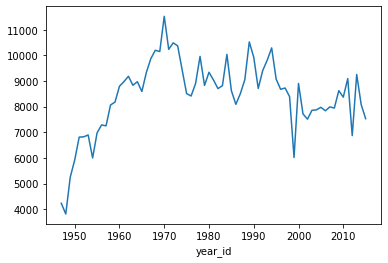

In [114]:
# how many points the Knicks scored throughout the seasons
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

__Comment__. line plot with several peaks and two notable valleys around the years 2000 and 2010

In [115]:
nba["fran_id"].value_counts().head(10)

Lakers      6024
Celtics     5997
Knicks      5769
Warriors    5657
Pistons     5650
Sixers      5644
Hawks       5572
Kings       5475
Wizards     4582
Spurs       4309
Name: fran_id, dtype: int64

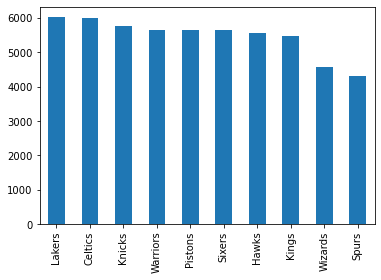

In [116]:
# plot top 10
nba["fran_id"].value_counts().head(10).plot(kind="bar")

The Lakers are leading the Celtics by a minimal edge, and there are six further teams with a game count above 5000.

In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season.

In [117]:
nba[nba["year_id"] == 2013]["fran_id"].value_counts().head(7)

Heat         105
Spurs        103
Pacers       100
Grizzlies     97
Bulls         94
Warriors      94
Knicks        94
Name: fran_id, dtype: int64

In [118]:
nba[
    (nba["fran_id"] == "Heat") &
    (nba["year_id"] == 2013)
]["game_result"].value_counts()

W    82
L    23
Name: game_result, dtype: int64

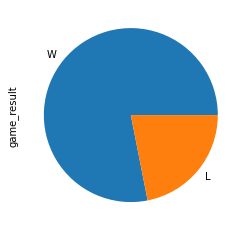

In [119]:
nba[
    (nba["fran_id"] == "Heat") &
    (nba["year_id"] == 2013)
]["game_result"].value_counts().plot(kind="pie")

### Conclusion